In [154]:
import pandas as pd
import numpy as np

# text preprocessing
from nltk.tokenize import word_tokenize
import re
import neattext.functions as nfx
# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# keras layers
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense


In [155]:



# Number of dimensions for word embedding
embed_num_dims = 300

# Max input length (max number of words) 
max_seq_len = 80



In [156]:
#data=pd.read_csv('dataset/isear.csv')
data=pd.read_csv('dataset/dailydialog.csv')
#data=pd.read_csv('dataset/emotion-stimulus.csv')
#data=pd.read_csv('dataset/text_emotion.csv')

In [157]:
data['Emotion'].value_counts()

0    85572
4    12885
6     1823
5     1150
1     1022
2      353
3      174
Name: Emotion, dtype: int64

In [158]:

dir(nfx)




['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [159]:

data['Clean_Text']=data['Text'].apply(nfx.remove_special_characters)

In [160]:
data['Clean_Text']=data['Clean_Text'].apply(nfx.remove_punctuations)

In [161]:
data['Clean_Text']=data['Clean_Text'].apply(nfx.remove_stopwords)

In [162]:
data['Clean_Text']=data['Clean_Text'].apply(nfx.remove_userhandles)

In [163]:
data[['Text','Clean_Text']]

,Text,Clean_Text
0,"Say , Jim , how about going for a few beers af...",Jim going beers dinner
1,You know that is tempting but is really not g...,know tempting good fitness
2,What do you mean ? It will help us to relax .,mean help relax
3,Do you really think so ? I don't . It will ju...,think dont fat act silly Remember time
4,I guess you are right.But what shall we do ? ...,guess rightBut shall dont feel like sitting home
...,...,...
102974,"Oh , it must be very precious . Is it breakab...",Oh precious breakable
102975,"No , if you take some care when you use them .",care use
102976,How much is it ?,
102977,Two thousand .,thousand


In [164]:
data['Emotion'].value_counts()

0    85572
4    12885
6     1823
5     1150
1     1022
2      353
3      174
Name: Emotion, dtype: int64

In [131]:
#Daily Dialog:

#sent_to_id  = {"sad":0, "anger":1, "happy":2, "fear":3, "surprise":4, "shame":5, "disgust":6}


#Isear:
#sent_to_id  = {"joy":0, "fear":1, "anger":2, "sadness":3, "disgust":4, "shame":5, "guilt":6}

# Tweet Emotion:
#sent_to_id  = {"neutral":0, "worry":1, "happiness":2, "sadness":3, "love":4, "surprise":5, "fun":6, "relief":7, "hate":8, "empty":9, "enthusiasm":10, "boredom":11, "anger":12}

In [132]:
#data["sentiment_id"] = data['sentiment'].map(sent_to_id)

In [133]:
#data["sentiment_id"]

0         9
1         3
2         3
3        10
4         0
         ..
39995     0
39996     4
39997     4
39998     2
39999     4
Name: sentiment_id, Length: 40000, dtype: int64

In [165]:
data

,Emotion,Text,Clean_Text
0,0,"Say , Jim , how about going for a few beers af...",Jim going beers dinner
1,0,You know that is tempting but is really not g...,know tempting good fitness
2,0,What do you mean ? It will help us to relax .,mean help relax
3,0,Do you really think so ? I don't . It will ju...,think dont fat act silly Remember time
4,0,I guess you are right.But what shall we do ? ...,guess rightBut shall dont feel like sitting home
...,...,...,...
102974,0,"Oh , it must be very precious . Is it breakab...",Oh precious breakable
102975,0,"No , if you take some care when you use them .",care use
102976,0,How much is it ?,
102977,0,Two thousand .,thousand


In [166]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data.Emotion)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
Y = onehot_encoder.fit_transform(integer_encoded)

In [167]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [168]:
Xfeatures=data['Clean_Text']

In [169]:
#final = data[['Clean_Text', 'Emotion']]
#print("Train DataFrame")
#display(final.head(3))

In [170]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xfeatures,Y, random_state=42, test_size=0.2, shuffle=True)

In [171]:
from keras.preprocessing import sequence, text
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, processors
token = text.Tokenizer()
token.fit_on_texts(list(X_train) + list(X_test))

index_of_words = token.word_index

# vacab size is number of unique words + reserved 0 index for padding
vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

X_train_pad = sequence.pad_sequences(token.texts_to_sequences(X_train), maxlen=max_seq_len)
X_test_pad = sequence.pad_sequences(token.texts_to_sequences(X_test), maxlen=max_seq_len)

Number of unique words: 22652


In [172]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open(filepath,encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix

In [142]:
import urllib.request
import zipfile
import os

fname = 'embeddings/wiki-news-300d-1M.vec'

if not os.path.isfile(fname):
    print('Downloading word vectors...')
    urllib.request.urlretrieve('https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip',
                              'wiki-news-300d-1M.vec.zip')
    print('Unzipping...')
    with zipfile.ZipFile('wiki-news-300d-1M.vec.zip', 'r',encoding="utf8") as zip_ref:
        zip_ref.extractall('embeddings')
    print('done.')
    
    os.remove('wiki-news-300d-1M.vec.zip')

In [173]:
embedd_matrix = create_embedding_matrix(fname, index_of_words, embed_num_dims)
embedd_matrix.shape

(22653, 300)

In [174]:
new_words = 0

for word in index_of_words:
    entry = embedd_matrix[index_of_words[word]]
    if all(v == 0 for v in entry):
        new_words = new_words + 1

print('Words found in wiki vocab: ' + str(len(index_of_words) - new_words))
print('New words found: ' + str(new_words))

Words found in wiki vocab: 17842
New words found: 4810


In [175]:
embedd_layer = Embedding(vocab_size,
                         embed_num_dims,
                         input_length = max_seq_len,
                         weights = [embedd_matrix],
                         trainable=False)

In [179]:
#LSTM
from keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense
gru_output_size = 128
bidirectional = False

# Embedding Layer, LSTM or biLSTM, Dense, softmax
model = Sequential()
model.add(embedd_layer)

if bidirectional:
    model.add(Bidirectional(GRU(units=gru_output_size,
                              dropout=0.2,
                              recurrent_dropout=0.2)))
else:
     model.add(GRU(units=gru_output_size,
                dropout=0.2, 
                recurrent_dropout=0.2))

model.add(Dense(7, activation='softmax'))

#cnn
#kernel_size = 3
#filters = 256

#model = Sequential()
#model.add(embedd_layer)
#model.add(Conv1D(filters, kernel_size, activation='relu'))
#model.add(GlobalMaxPooling1D())
#model.add(Dense(256, activation='relu'))
#model.add(Dense(13, activation='softmax'))

In [180]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 80, 300)           6795900   
                                                                 
 gru_13 (GRU)                (None, 128)               165120    
                                                                 
 dense_13 (Dense)            (None, 7)                 903       
                                                                 
Total params: 6,961,923
Trainable params: 166,023
Non-trainable params: 6,795,900
_________________________________________________________________


In [ ]:
batch_size = 128
epochs = 6

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Epoch 1/6
 73/644 [==>...........................] - ETA: 4:35 - loss: 0.7753 - accuracy: 0.8144

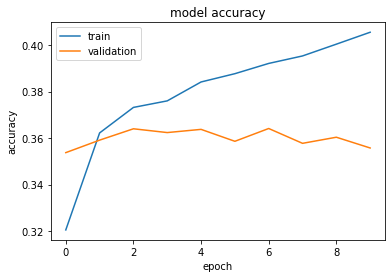

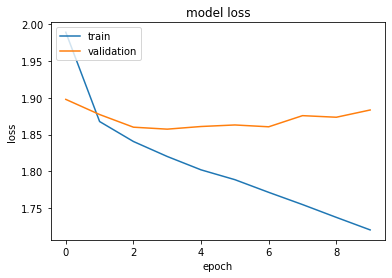

In [152]:
# Accuracy plot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn import metrics

y_test_arg=np.argmax(y_test,axis=1)

predicted = model.predict(X_test_pad)
predict_classes=np.argmax(predicted,axis=1)
predict_classes[1]                        
print('Confusion Matrix')
print(metrics.classification_report(y_test_arg, predict_classes))

Confusion Matrix
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00       162
           3       0.00      0.00      0.00       163
           4       0.14      0.07      0.10       338
           5       0.31      0.42      0.36      1028
           6       0.36      0.31      0.33       268
           7       0.46      0.45      0.45       762
           8       0.39      0.52      0.44      1740
           9       0.29      0.02      0.03       352
          10       0.37      0.23      0.28      1046
          11       0.27      0.06      0.09       425
          12       0.34      0.48      0.39      1666

    accuracy                           0.36      8000
   macro avg       0.22      0.20      0.19      8000
weighted avg       0.33      0.36      0.33      8000



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
